# Initial Load and Data Cleaning 

In this workbook we:
1. Load the data into pandas DataFrames
2. Inspect and observe the DataFrames
3. Clean and convert the data into appropriate types


## Initial Reading of data files

In [1092]:
import pandas as pd
import numpy as nm
from os import listdir
import seaborn as sns

path = 'zippedData/'

In [1021]:
#helper to list all csv or type files in a dir
def find_csv_filenames( path_to_dir, suffix=".csv"):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

#creates dataframes for type specified
def create_dfs(filelist, suffix=".csv" ):
    #Read all the files and store in a dataFrame
    # the data Frames for each file will be listed in a dict 
    # where key is the name and value is the df
    dict_csv_files = {}
    path = 'zippedData/'
    for filename in csvfiles:
        filename_cleaned = filename.replace(".csv", "").replace(".","_")#cleaning
        filename_df = pd.read_csv(path + filename, index_col = 0, encoding='utf8')
        dict_csv_files[filename_cleaned] = filename_df
    return dict_csv_files    


In [872]:
#Create csvfiles, tsvfiles and call createdfs dict
csvfiles = find_csv_filenames(path)
tsvfiles = find_csv_filenames(path,'.tsv')
dict_dfs = create_dfs(csvfiles, suffix=".csv" )

In [873]:
dict_dfs.keys()

dict_keys(['bom_movie_gross', 'imdb_name_basics', 'imdb_title_akas', 'imdb_title_basics', 'imdb_title_crew', 'imdb_title_principals', 'imdb_title_ratings', 'tmdb_movies', 'tn_movie_budgets - Copy', 'tn_movie_budgets'])

In [874]:
##Create Working DataFrames
df_bom = dict_dfs['bom_movie_gross']
df_imdb_name = dict_dfs['imdb_name_basics']       
df_imdb_akas = dict_dfs['imdb_title_akas']       
df_imdbbasics = dict_dfs['imdb_title_basics']    
df_imdb_crew = dict_dfs['imdb_title_crew']     
df_imdb_principals = dict_dfs['imdb_title_principals']     
df_imdb_ratings = dict_dfs['imdb_title_ratings']         
df_tmb = dict_dfs['tmdb_movies']                        
df_tn_movie_budget = dict_dfs['tn_movie_budgets']
#Excluding rott.tsvfiles  df_rott_info = dict_dfs(' pd.read_csv('zippedData/rt.movie_info.tsv', sep='\t')
#df_rott_rev = dict_dfs(' pd.read_csv('zippedData/rt.reviews.tsv',encoding= 'unicode_escape', sep='\t')

## Inspect DataFrames
Inspecting the dfs, Noting observations about the data, describing the data types.  
We have 9 DataFrames from the 9 files:  
df_bom  
df_imdb_name   
df_imdb_akas   
df_imdbbasics   
df_imdb_crew  
df_imdb_principals      
df_imdb_ratings          
df_tmb        
df_tn_movie_budget  

### Box Office Mojo-df_bom

In [875]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [876]:
df_bom.head(3)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


#### Observation df_bom (Box office Mojo) 
It looks as if the data is for 2010 to 2018 movies 
of domestic and foreign gross in dollars.   
Foreign gross needs to be converted to int datatype.

### IMDB name basics-df_imdb_name

In [877]:
df_imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606648 entries, nm0061671 to nm9993380
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   primary_name        606648 non-null  object 
 1   birth_year          82736 non-null   float64
 2   death_year          6783 non-null    float64
 3   primary_profession  555308 non-null  object 
 4   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.8+ MB


In [878]:
df_imdb_name.head(3)

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


#### Observation df_imdb_name 
It looks as if the data is a name and profession
and known for these movie titles.  
The birth year and death year can be dropped as 
there is a high percentage of data missing from those columns.

### IMDB akas-df_imdb_akas

In [879]:
df_imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [880]:
df_imdb_akas.head(3)

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


#### Observation df_imdb_akas
This data looks to be aka movie names in non domestic markets.  There are lots of NaNs.  Should we just look at isoriginal title as 1?  Where does the title_id link to?  Is ok to leave NaNs alone?

### IMDBTitle basics-df_imdbbasics

In [881]:
df_imdbbasics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [882]:
df_imdbbasics.tail(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


#### Observation df_df_imdbbasics
This data has primary title and original title and year and genre of the movie.  Many missing runtime minutes can set to 90 mins?  Main point here is the genre and year and title.

### IMDB Crew-df_imfb_crew

In [883]:
df_imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  140417 non-null  object
 1   writers    110261 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [884]:
df_imdb_crew.head(3)

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585


#### Observation df_df_imdb_crew
This df matches directors and writers to tconst which is primary key in df_imdbbasics and df_imdb_principals.

### IMDB principals - df_imfb_principals

In [885]:
df_imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         177684 non-null   object
 4   characters  393360 non-null   object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


In [886]:
df_imdb_principals.head(3)

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN


#### Observation df_imdb_principals
This data lists the roles of principals in movies(tconst) to categories and job and characters if they act.            
  Links to df_imdb_crew, df_imdbbasics, df_imdb_name, df_imdb_ratings.             
      nconst links to values in the df_imdb_crew and df_imdb_name listing the directors and writers.

### IMDB ratings-df_imfb_ratings

In [887]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [888]:
df_imdb_ratings.head(3)

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20


#### Observation df_imdb_ratings
Pretty straightforward rating and number of votes.  title tconst links to tconst(title) in other imdb tables.

### TMB-df_tmb



In [889]:
##The Movie DB
df_tmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [890]:
df_tmb.tail(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


#### Observation df_tmb
There are no Nans.  This looks to be good data about the movies and genres.  
Release date is an object and may be converted to a datatime if to be used.  Where to look up genre_ids?



### TN The Numbers-df_tn_movie_budget

In [891]:
##The Numbers
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [1020]:
df_tn_movie_budget.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.3
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.7
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.2
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.4
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.4
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,571.0
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,582.7
8,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,6.634204e+08,221.1
9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,118.6


#### Observation df_tn_movie_budget
There are no Nans.  This data is the movies, release date 
and worldwide gross with production budget.    Money data should be converted to 
int and dollas signs removed
Release date is an object and may be converted to a datatime if to be used.

<br><br><br><br><br><br>



## Data Cleaning and Typing
Removing the NanNs, dropping columns which have no importance or too many nans, converting object datatypes to be useful.

### <font color="green">Clean df_bom data</font>

In [893]:
df_bom.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [894]:
df_bom.shape

(3387, 4)

In [895]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [896]:
#If NaN setting to 0..
df_bom.fillna(0, inplace=True)

In [897]:
df_bom.isna().sum()

studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [898]:
df_bom.info()
#Need to convert the foreign gross to float

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


 A Few values needed to be converted to billions

In [899]:
# When converting to numeric foreign gross at line numbers 1872,1873,1874,2760,
#3079 were in a shorthand billions
# ie 1,131.6 for 1131600000.
# this is the quick fix
df_bom.iloc[[1872],[2]] =1131600000.0
df_bom.iloc[[1873],[2]] =1019400000.0
df_bom.iloc[[1874],[2]] =1163000000.0
df_bom.iloc[[2760],[2]] =1010000000.0
df_bom.iloc[[3079],[2]] =1369500000.0


Convert the object number of foreign gross to numeric 

In [900]:
#Convert string to numeric values...5 or so of the billions needed to be converted
df_bom['foreign_gross'] = pd.to_numeric(df_bom['foreign_gross'])

In [901]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3387 non-null   float64
 2   foreign_gross   3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 132.3+ KB


In [902]:
#creating the worldwide_gross column from the dommestic and foreign gross
df_bom['worldwide_gross'] = df_bom['domestic_gross'] + df_bom['foreign_gross']

In [903]:
df_bom.head()

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


<font color='green'>Observation</font> Set Foreign gross to 0 if NaN.  If we need we can use the movie budget to look up.
Converted money columns to floats. Created worldwide_gross from domestc and foreign.



### <font color="green">Clean imdb_name data</font>

In [904]:
df_imdb_name.shape

(606648, 5)

In [905]:
df_imdb_name.isna().sum()

primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [906]:
#Can drop birth_year and death year
df_imdb_name = df_imdb_name.drop(columns=['birth_year','death_year'])

drop if both primary_profession and known_for_titles are both Nan

In [907]:
df_imdb_name.isna().sum()

primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

In [908]:
#drop if both primary_profession and known_for_titles are both Nan
col_lst = ['primary_profession', 'known_for_titles']
df_imdb_name.dropna(axis = 0, subset = col_lst, how = 'all', inplace = True)


In [909]:
df_imdb_name.isna().sum()

primary_name              0
primary_profession    41307
known_for_titles      20171
dtype: int64

<font color='green'>Observation</font> lots of NaNs but are supposed to be blank if non applicable.  put in holder value(NA, or job or characters? or 0?  Dropped 'birth_year','death_year'. If NAN for known_for can drop?  Final decision to fill na with 'unknown'

In [910]:
df_imdb_name[df_imdb_name['known_for_titles'].isna()].head()

,primary_name,primary_profession,known_for_titles
nconst,,,
nm10108345,Jiaxi Li,actor,NaN
nm10113099,Greg Quibell,actor,NaN
nm10114259,Vera Prifatamasari,actress,NaN
nm10115487,Laurette De Haan,"director,writer,cinematographer",NaN
nm10115788,Sustraida's Band,composer,NaN


In [911]:
#if there is a Nan in remaining data fill in with unknown
df_imdb_name['known_for_titles'].fillna(value='unknown', inplace=True)
df_imdb_name['primary_profession'].fillna(value='unknown', inplace=True)

In [912]:
df_imdb_name.isna().sum()

primary_name          0
primary_profession    0
known_for_titles      0
dtype: int64

In [913]:
df_imdb_name.shape

(596615, 3)

### <font color="green">Clean imdb_akas data</font>

In [914]:
df_imdb_akas.shape

(331703, 7)

In [915]:
df_imdb_akas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331703 entries, tt0369610 to tt9880178
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ordering           331703 non-null  int64  
 1   title              331703 non-null  object 
 2   region             278410 non-null  object 
 3   language           41715 non-null   object 
 4   types              168447 non-null  object 
 5   attributes         14925 non-null   object 
 6   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 20.2+ MB


In [916]:
#Unsure if this data is useful
#df_imdb_akas = df_imdb_akas[df_imdb_akas['is_original_title'] == 1.0]

In [917]:
df_imdb_akas.isna().sum()

ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

In [918]:
df_imdb_akas.head(3)

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


In [919]:
set(df_imdb_akas['types'])

{'alternative',
 'dvd',
 'dvd\x02imdbDisplay',
 'festival',
 'festival\x02working',
 'imdbDisplay',
 nan,
 'original',
 'tv',
 'video',
 'working'}

In [920]:
#for NaNs in these columns set to unknown
col_list = ['region','language','types','attributes']
for col in col_list:
    
    df_imdb_akas[col].fillna(value='unknown', inplace=True)
 

In [921]:
df_imdb_akas.isna().sum()

ordering              0
title                 0
region                0
language              0
types                 0
attributes            0
is_original_title    25
dtype: int64

In [922]:
df_imdb_akas = df_imdb_akas[df_imdb_akas['is_original_title'].notna()]

In [923]:
df_imdb_akas.shape

(331678, 7)

<font color='green'>Actions</font> In columns 'region','language','types','attributes'set Nan to 'unknown 
<br>removed is_original title id Nan

### <font color="green">Clean imdb_basics data</font>

In [924]:
df_imdbbasics.shape

(146144, 5)

In [925]:
df_imdbbasics.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [1076]:
df_imdbbasics[df_imdbbasics.primary_title.str.match('Don\'t Breathe')].head(50)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt3958034,Don't Breathe,Don't Breathe,2014,86.0,Documentary
tt4160708,Don't Breathe,Don't Breathe,2016,88.0,"Crime,Horror,Thriller"


In [1037]:
df_tn_movie_budget[df_tn_movie_budget.movie.str.match('Tripp')]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent
id,,,,,,,
96,"May 12, 1999",Trippin',3000000.0,9017070.0,9017070.0,6017070.0,200.6


In [1027]:
df_imdbbasics.tail(60)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt9906644,Manoharam,Manoharam,2019,89.5,"Comedy,Drama"
tt9906696,Footloose in Italy IV: 4 Rimini Tuscany Rome,Footloose in Italy IV: 4 Rimini Tuscany Rome,2016,150.0,unknown
tt9906844,Footloose in England's Lake District,Footloose in England's Lake District,2017,150.0,unknown
tt9907032,Footloose in London II: 2 Undiscovered and Unu...,Footloose in London II: 2 Undiscovered and Unu...,2018,124.0,unknown
tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,unknown
tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,unknown
tt9908390,Le lion,Le lion,2020,89.5,Comedy
tt9908448,The Bells of Hell,The Bells of Hell,2018,88.0,"Drama,Fantasy"
tt9908592,Filmmakers Unite (FU),Filmmakers Unite (FU),2018,78.0,Documentary


In [927]:
df_imdbbasics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [928]:
#for NaNs in these columns set to unknown
col_list = ['genres','original_title']
for col in col_list:
    
    df_imdbbasics[col].fillna(value='unknown', inplace=True)

In [929]:
#If runtime minutes missing set to 89.5 minutes
df_imdbbasics['runtime_minutes'].fillna(89.5,inplace=True)


In [930]:
df_imdbbasics.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

<font color='green'>Actions</font> In columns 'genres','original_title' set Nan to 'unknown 
<br>if runtime minutes set to 89.5 if Nan

### <font color="green">Clean imdb_crew data</font>

In [931]:
df_imdb_crew.shape

(146144, 2)

In [932]:
df_imdb_crew.isna().sum()

directors     5727
writers      35883
dtype: int64

In [933]:
df_imdb_crew.head(5)

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [934]:
df_imdb_crew.shape

(146144, 2)

In [935]:
df_imdb_crew = df_imdb_crew[df_imdb_crew['directors'].notna() 
                            | df_imdb_crew['writers'].notna()]

In [936]:
#for NaNs in these columns set to unknown
col_list = ['directors','writers']
for col in col_list:
    df_imdb_crew[col].fillna(value='unknown', inplace=True)

C:\Users\dsmith\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [937]:
df_imdb_crew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141670 entries, tt0285252 to tt9010172
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   directors  141670 non-null  object
 1   writers    141670 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB


<font color='green'>Actions</font> If directors and writers are NaN drop row(4474 rows).  If then if directors is Nan replace with holder 'unknown'.  If writers is Nan replace with unknown.

### <font color="green">Clean imdb_principals data</font>

In [938]:
df_imdb_principals.shape

(1028186, 5)

In [939]:
df_imdb_principals.tail()

,ordering,nconst,category,job,characters
tconst,,,,,
tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
tt9692684,3,nm10441594,director,NaN,NaN
tt9692684,4,nm6009913,writer,writer,NaN
tt9692684,5,nm10441595,producer,producer,NaN


In [940]:
df_imdb_principals.isna().sum()

ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [941]:
#for NaNs in these columns set to unknown
col_list = ['job','characters']
for col in col_list:
    df_imdb_principals[col].fillna(value='unknown', inplace=True)

In [942]:
df_imdb_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028186 entries, tt0111414 to tt9692684
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   ordering    1028186 non-null  int64 
 1   nconst      1028186 non-null  object
 2   category    1028186 non-null  object
 3   job         1028186 non-null  object
 4   characters  1028186 non-null  object
dtypes: int64(1), object(4)
memory usage: 47.1+ MB


<font color='green'>Actions</font> replaced columns job and characters if Nan to 'unknown'

### <font color="green">Clean imdb_ratings data</font>

In [943]:
df_imdb_ratings.shape

(73856, 2)

In [944]:
df_imdb_ratings.isna().sum()

averagerating    0
numvotes         0
dtype: int64

In [945]:
df_imdb_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [946]:
df_imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


<font color=green>Actions</font> All Clean.  No missing data in this lookup table

### <font color="green">Clean df_tmb data</font>

In [947]:
df_tmb.shape

(26517, 9)

In [948]:
df_tmb.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [949]:
df_tmb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [950]:
df_tmb.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


<font color=green>Actions:</font> Clean Data Note: Convert release date to datetime when using

### <font color="green">Clean df_tn_movie_budget data</font>

In [951]:
df_tn_movie_budget.shape

(5782, 5)

In [952]:
df_tn_movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [1024]:
df_tn_movie_budget.head(10)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.3
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.7
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.2
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.4
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.4
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,571.0
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,582.7
8,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,6.634204e+08,221.1
9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,118.6


In [954]:
for col in df_tn_movie_budget:
    print(col)
    print(df_tn_movie_budget[col].value_counts(normalize = True)[:5])
    print("===================================")

release_date
Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64
movie
King Kong        0.000519
Home             0.000519
Halloween        0.000519
Unforgettable    0.000346
Godzilla         0.000346
Name: movie, dtype: float64
production_budget
$20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64
domestic_gross
$0             0.094777
$8,000,000     0.001557
$7,000,000     0.001211
$2,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64
worldwide_gross
$0            0.063473
$8,000,000    0.001557
$7,000,000    0.001038
$2,000,000    0.001038
$9,000,000    0.000692
Name: worldwide_gross, dtype: float64


Domectic gross has 9.4 % of zero values.  Similiar to worldwide gross.  

Will need to address.

look at budget data in bom, rott, tn
df_tn_movie_budget[df_tn_movie_budget['domestic_gross'] > 500000000.0]

In [955]:
#Convert the object columns to ints where we can manipulate mathematically
#money string to ints
def money_to_float(df,col):
    df[col] = df[col].astype(str).str.replace("$", "").str.replace(",", "").astype('float')
    return df

In [956]:
money_cols = ['production_budget','domestic_gross', 'worldwide_gross']

for col in money_cols:
    df_tn_movie_budget = money_to_float(df_tn_movie_budget,col)

In [957]:
df_tn_movie_budget.head(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


In [958]:
df_tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


<font color=green>Actions</font> Converted string currrency to float values. Convert release date to datetime when using

## Data Exploration

### Best Return on Investment of Medium budget movies
In industry terms there are four types of production level movies.
1. High Budget: Production budget(PB) is greater than $80 Million
2. Medium Budget: PB is between $2 Million to $80 Million
3. Low Bugdet: PB is between $10K and $2 Million  
4. Micro Budget: PB is under 10K  
Microscoft would not want to take a chance on high budget so we will look at returns on movies below $65 Million(average)

Lets look at the df_tn_movie_budget data

In [959]:
df_tn_movie_budget.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Lets create difference between worldwide gross and prod budget 
profit = returned - investment 
profit_over_pb = worldwide_gross - production_budget

and also percent returned for movies with budgets below $65Mill
 ROI = Net Profit / Cost of the investment * 100
 roi_percent= profit_over_pb / production_budget *100

In [960]:
df_tn_movie_budget['profit_over_pb'] = df_tn_movie_budget['worldwide_gross'] - \
df_tn_movie_budget['production_budget']

In [961]:
df_tn_movie_budget['roi_percent'] = round((df_tn_movie_budget['profit_over_pb'] / \
df_tn_movie_budget['production_budget'])*100,1)

In [962]:
df_tn_movie_budget.sort_values(by='roi_percent',ascending = False).head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent
id,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,44975000.0,179900.0
14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,99550000.0,49775.0
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,193733034.0,43051.8
80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,41556474.0,41556.5
7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,247700000.0,41283.3
10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,22168808.0,34105.9
47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,267142000.0,31135.4
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,2034928.0,29070.4
77,"Oct 1, 1968",Night of the Living Dead,114000.0,12087064.0,30087064.0,29973064.0,26292.2


Lets filter to look at movies where budget is less than=$65 mill

In [963]:
df_budget_sub65m = df_tn_movie_budget[df_tn_movie_budget['production_budget'] \
                   <= 65000000.0].sort_values(by='roi_percent', ascending = False)

In [964]:
df_budget_sub65m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5012 entries, 46 to 63
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5012 non-null   object 
 1   movie              5012 non-null   object 
 2   production_budget  5012 non-null   float64
 3   domestic_gross     5012 non-null   float64
 4   worldwide_gross    5012 non-null   float64
 5   profit_over_pb     5012 non-null   float64
 6   roi_percent        5012 non-null   float64
dtypes: float64(5), object(2)
memory usage: 313.2+ KB


In [965]:
df_budget_sub65m.reset_index(inplace =True) 

In [966]:
df_budg_2to65mil = df_budget_sub65m[df_budget_sub65m['production_budget'] \
                   >= 2000000.0].sort_values(by='roi_percent', ascending = False)

In [967]:
df_budg_2to65mil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4231 entries, 28 to 5010
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4231 non-null   int64  
 1   release_date       4231 non-null   object 
 2   movie              4231 non-null   object 
 3   production_budget  4231 non-null   float64
 4   domestic_gross     4231 non-null   float64
 5   worldwide_gross    4231 non-null   float64
 6   profit_over_pb     4231 non-null   float64
 7   roi_percent        4231 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 297.5+ KB


In [968]:
df_budg_2to65mil.reset_index(inplace =True) 

In [969]:
df_budg_2to65mil['x_times_invest'] = round(df_budg_2to65mil['worldwide_gross']/df_budg_2to65mil['production_budget'],1)

In [970]:
df_budg_2to65mil.head(10)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
0,28,68,"Dec 15, 1939",Gone with the Wind,3900000.0,198680470.0,390525192.0,386625192.0,9913.5,100.1
1,31,76,"Feb 15, 1950",Cinderella,2900000.0,85000000.0,263591415.0,260691415.0,8989.4,90.9
2,36,26,"Jun 11, 1982",ET: The Extra-Terrestrial,10500000.0,435110554.0,792965326.0,782465326.0,7452.1,75.5
3,37,48,"Apr 19, 2002",My Big Fat Greek Wedding,5000000.0,241438208.0,374890034.0,369890034.0,7397.8,75.0
4,38,90,"Aug 13, 1997",The Full Monty,3500000.0,45950122.0,261249383.0,257749383.0,7364.3,74.6
5,39,65,"May 25, 1977",Star Wars Ep. IV: A New Hope,11000000.0,460998007.0,786598007.0,775598007.0,7050.9,71.5
6,45,13,"Jun 16, 1978",Grease,6000000.0,181813770.0,387510179.0,381510179.0,6358.5,64.6
7,52,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2
8,54,50,"Jan 20, 2017",Split,5000000.0,138141585.0,278964806.0,273964806.0,5479.3,55.8
9,56,25,"Mar 9, 1994",Four Weddings and a Funeral,4500000.0,52700832.0,242895809.0,238395809.0,5297.7,54.0


In [971]:
df_budg_2to65mil_21yr = df_budg_2to65mil[pd.to_datetime(df_budg_2to65mil['release_date']).dt.year >= 2000]

In [972]:
df_budg_2to65mil_11yr = df_budg_2to65mil[pd.to_datetime(df_budg_2to65mil['release_date']).dt.year >= 2010]

In [973]:
df_budg_2to65mil_21yr.reset_index(inplace =True) 

In [974]:
df_budg_2to65mil_21yr.describe()

,level_0,index,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
count,3108.000000,3108.000000,3108.000000,3.108000e+03,3.108000e+03,3.108000e+03,3.108000e+03,3108.00000,3108.000000
mean,2204.878057,2532.508044,50.421815,2.197390e+07,2.799976e+07,5.521247e+07,3.323856e+07,177.30888,2.771396
std,1207.225865,1332.975021,28.603299,1.674479e+07,3.816948e+07,7.828316e+07,7.179618e+07,452.78887,4.529242
min,3.000000,37.000000,1.000000,2.000000e+06,0.000000e+00,0.000000e+00,-6.448372e+07,-100.00000,0.000000
25%,1185.000000,1425.000000,26.000000,8.000000e+06,1.346376e+06,5.937068e+06,-4.491170e+06,-54.42500,0.500000
50%,2221.500000,2523.500000,50.000000,1.800000e+07,1.451299e+07,2.785930e+07,8.019424e+06,51.20000,1.500000
75%,3250.250000,3646.250000,75.000000,3.200000e+07,3.980111e+07,7.396734e+07,4.677707e+07,233.30000,3.300000
max,4230.000000,5010.000000,100.000000,6.500000e+07,3.707829e+08,8.949853e+08,8.399853e+08,7397.80000,75.000000


In [975]:
df_budg_2to65mil_11yr.reset_index(inplace =True) 

In [976]:
df_budg_2to65mil_11yr.describe()

,level_0,index,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
count,1485.000000,1485.000000,1485.000000,1.485000e+03,1.485000e+03,1.485000e+03,1.485000e+03,1485.000000,1485.000000
mean,2207.599327,2542.965657,51.546128,2.082116e+07,2.718077e+07,5.767083e+07,3.684966e+07,200.663569,3.004377
std,1280.861844,1423.621413,28.217390,1.654820e+07,3.899086e+07,8.573114e+07,7.879218e+07,502.658395,5.027945
min,7.000000,52.000000,1.000000,2.000000e+06,0.000000e+00,0.000000e+00,-6.448372e+07,-100.000000,0.000000
25%,1132.000000,1369.000000,28.000000,7.000000e+06,3.100070e+05,3.721988e+06,-4.412809e+06,-67.800000,0.300000
50%,2142.000000,2439.000000,52.000000,1.600000e+07,1.254598e+07,2.638704e+07,9.867665e+06,61.500000,1.600000
75%,3415.000000,3822.000000,76.000000,3.000000e+07,3.912359e+07,7.634739e+07,4.940194e+07,246.200000,3.500000
max,4230.000000,5010.000000,100.000000,6.500000e+07,3.630707e+08,8.949853e+08,8.399853e+08,5817.100000,59.200000


In [977]:
#Insert graph of all movies roi with red line at 2.5x or 150% roi

What is our target?  Based on industry research moives dont truly turn a profit until the 2.0 to 2.5 mark due to marketing and distributors. 
Note the median value of this data of safe medium budget movies (2-65mil) is 37% ROI or 1.4 x the investment.
 Lets set our target at movies with 150% ROI_percent ie wwgross 2.5 times the investment.
 PB is 5000000 2.5 times is 12,500,000    profit is 7500000  ROI%=7500000 /5000000 *100 =150%

How many movies with roi percent at >=150

In [978]:
df_budg_2to65mil_11yr[df_budg_2to65mil_11yr['roi_percent'] >= 150]

,level_0,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
0,7,52,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2
1,8,54,50,"Jan 20, 2017",Split,5000000.0,138141585.0,278964806.0,273964806.0,5479.3,55.8
2,10,60,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1
3,13,65,18,"May 25, 2012",Les Intouchables,10800000.0,13182281.0,484873045.0,474073045.0,4389.6,44.9
4,15,69,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4
...,...,...,...,...,...,...,...,...,...,...,...
528,1541,1805,81,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5
529,1542,1806,58,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5
530,1550,1814,82,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5
531,1556,1821,8,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5


533 successful movies
INSERT graph of top 10

In [979]:
df_budg_2to65mil_11yr[df_budg_2to65mil_11yr['roi_percent'] >= 150].head(20)


,level_0,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest
0,7,52,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2
1,8,54,50,"Jan 20, 2017",Split,5000000.0,138141585.0,278964806.0,273964806.0,5479.3,55.8
2,10,60,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1
3,13,65,18,"May 25, 2012",Les Intouchables,10800000.0,13182281.0,484873045.0,474073045.0,4389.6,44.9
4,15,69,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4
5,17,74,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5
6,29,96,53,"Sep 13, 2013",Insidious Chapter 2,5000000.0,83586447.0,161921515.0,156921515.0,3138.4,32.4
7,31,98,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0
8,35,104,67,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4
9,37,107,55,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8


In [980]:
df_budg_success_11yrs = df_budg_2to65mil_11yr[df_budg_2to65mil_11yr['roi_percent'] >= 150]

In [981]:
df_budg_success_11yrs = df_budg_success_11yrs.drop(columns=['level_0','index'])


In [982]:
df_budg_success_11yrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 532
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 533 non-null    int64  
 1   release_date       533 non-null    object 
 2   movie              533 non-null    object 
 3   production_budget  533 non-null    float64
 4   domestic_gross     533 non-null    float64
 5   worldwide_gross    533 non-null    float64
 6   profit_over_pb     533 non-null    float64
 7   roi_percent        533 non-null    float64
 8   x_times_invest     533 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.6+ KB


In [983]:
df_budg_success_11yrs.to_csv(path_or_buf = path + 'budg_success_11yrs')

In [986]:
df_budg_success_11yrs.iloc[[11],[2]] = "The King\'s Speech"

In [1079]:
df_successtest = pd.read_csv(path + 'budg_success_11yrs', index_col = 0, encoding='utf8')
df_successtest.iloc[[34],[2]]

,movie
34,Don't Breathe


In [1088]:
df_imdbbasics.to_csv(path_or_buf = path + 'tidy_' + 'df_imdbbasics',encoding='utf8')
df_tn_movie_budget.to_csv(path_or_buf = path + 'tidy_' + 'df_tn_movie_budget',encoding='utf8')

In [1089]:
test_imdbbasics = pd.read_csv( path + 'tidy_' + 'df_imdbbasics', index_col = 0, encoding='utf8')
test_numbers_budget = pd.read_csv( path + 'tidy_' + 'df_tn_movie_budget', index_col = 0, encoding='utf8')


In [1090]:
test_numbers_budget.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent
id,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.3
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.7
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.2
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.4
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.4
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,571.0
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,582.7
8,"May 24, 2007",Pirates of the Caribbean: At World's End,300000000.0,309420425.0,9.634204e+08,6.634204e+08,221.1
9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,118.6


In [1081]:
df_successtest.iloc[[34],[2]] == 'Don\'t Breathe'

,movie
34,False


In [1062]:
df_successtest.iloc[[34],[2]]

,movie
34,Don'ÂÂt Breathe


In [1054]:
aval=df_successtest.iloc[[34],[2]]

In [1055]:
str(aval).encode('latin1').decode('utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 28: invalid start byte

In [990]:
df_budg_success_11yrs.to_csv(path_or_buf = path + 'budg_success_11yrs')

<AxesSubplot:xlabel='production_budget', ylabel='roi_percent'>

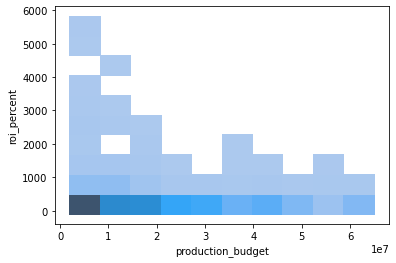

In [991]:
#df_budget_2to65mil_21yr['roi'].hist(bins=11, by='production_budget')
sns.histplot(y=df_budg_2to65mil_11yr['roi_percent'], x=df_budg_2to65mil_11yr['production_budget'],stat="count",bins=10
            )

<AxesSubplot:ylabel='roi_percent'>

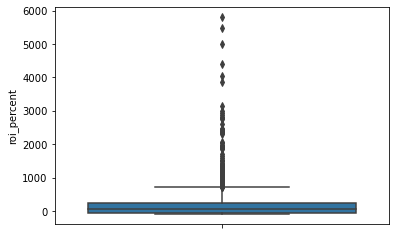

In [992]:
sns.boxplot(y=df_budg_2to65mil_11yr['roi_percent'])

Setting expectations on the ROI The Median RoI for movies in the medium budget range to 2mil to 65 mill is med 38% on return. Take in additional rule of thumb on marketing which is separate of the PB. the last 11 years is 37% I would say anything over this Roi would be a success as a first time movie maker. 50% roi to make everyone happy...  Then show histogram of group level of PB and Rois could do box plots of the same groups maybe..10 mil steps 2-15 15-25 25-35 35-45 45-55 55-65

### Most popular genres
best return on avg by genre
or which genres make most money on avg % of budget




df_imdbbasics basics had the genre info with movie

In [993]:
df_imdbbasics.head(3)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [994]:
df_budg_success_11yrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 0 to 532
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 533 non-null    int64  
 1   release_date       533 non-null    object 
 2   movie              533 non-null    object 
 3   production_budget  533 non-null    float64
 4   domestic_gross     533 non-null    float64
 5   worldwide_gross    533 non-null    float64
 6   profit_over_pb     533 non-null    float64
 7   roi_percent        533 non-null    float64
 8   x_times_invest     533 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 41.6+ KB


In [995]:
df_budget_genres = pd.merge(df_budg_success_11yrs, df_imdbbasics, 
                            left_on=  ['movie',pd.to_datetime(df_budg_success_11yrs['release_date']).dt.year],
                            right_on= ['primary_title','start_year'], 
                            how = 'left')

In [997]:
df_budget_genres.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,original_title,start_year,runtime_minutes,genres
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror
1,50,"Jan 20, 2017",Split,5000000.0,138141585.0,278964806.0,273964806.0,5479.3,55.8,NaN,NaN,2017,NaN,NaN
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller"
3,18,"May 25, 2012",Les Intouchables,10800000.0,13182281.0,484873045.0,474073045.0,4389.6,44.9,NaN,NaN,2012,NaN,NaN
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"Horror,Mystery,Thriller"
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,Annabelle,2014,99.0,"Horror,Mystery,Thriller"
6,53,"Sep 13, 2013",Insidious Chapter 2,5000000.0,83586447.0,161921515.0,156921515.0,3138.4,32.4,NaN,NaN,2013,NaN,NaN
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,Dangal,2016,161.0,"Action,Biography,Drama"
8,67,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,The Purge,The Purge,2013,85.0,"Horror,Thriller"
9,55,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8,Lights Out,Lights Out,2016,81.0,"Drama,Horror,Mystery"


In [998]:
#df_budget_genres.to_csv()

In [999]:
df_budget_genres.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 544 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 544 non-null    int64  
 1   release_date       544 non-null    object 
 2   movie              544 non-null    object 
 3   production_budget  544 non-null    float64
 4   domestic_gross     544 non-null    float64
 5   worldwide_gross    544 non-null    float64
 6   profit_over_pb     544 non-null    float64
 7   roi_percent        544 non-null    float64
 8   x_times_invest     544 non-null    float64
 9   primary_title      430 non-null    object 
 10  original_title     430 non-null    object 
 11  start_year         544 non-null    int64  
 12  runtime_minutes    430 non-null    float64
 13  genres             430 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 63.8+ KB


In [1000]:
df_budget_genres = df_budget_genres[df_budget_genres.genres != 'unknown']

In [1001]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 543 non-null    int64  
 1   release_date       543 non-null    object 
 2   movie              543 non-null    object 
 3   production_budget  543 non-null    float64
 4   domestic_gross     543 non-null    float64
 5   worldwide_gross    543 non-null    float64
 6   profit_over_pb     543 non-null    float64
 7   roi_percent        543 non-null    float64
 8   x_times_invest     543 non-null    float64
 9   primary_title      429 non-null    object 
 10  original_title     429 non-null    object 
 11  start_year         543 non-null    int64  
 12  runtime_minutes    429 non-null    float64
 13  genres             429 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 63.6+ KB


In [1002]:
#genres is a list of upto 3 genres, splitting it to get the individual genres
df_budget_genres['genres'] = df_budget_genres['genres'].astype(str).apply(lambda x: x.split(",") if x else x)
df_budget_genres.tail(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,original_title,start_year,runtime_minutes,genres
494,79,"Jul 5, 2012",Katy Perry: Part of Me,12000000.0,25326071.0,32700439.0,20700439.0,172.5,2.7,Katy Perry: Part of Me,Katy Perry: Part of Me,2012,93.0,"[Documentary, Music]"
495,98,"May 13, 2016",The Darkness,4000000.0,10753574.0,10898293.0,6898293.0,172.5,2.7,The Darkness,The Darkness,2016,92.0,"[Horror, Thriller]"
496,98,"May 13, 2016",The Darkness,4000000.0,10753574.0,10898293.0,6898293.0,172.5,2.7,The Darkness,Las tinieblas,2016,92.0,[Thriller]
497,75,"Mar 11, 2016",Eye in the Sky,13000000.0,18704596.0,35402802.0,22402802.0,172.3,2.7,NaN,NaN,2016,NaN,[nan]
498,22,"Apr 15, 2016",Barbershop: The Next Cut,20000000.0,54030051.0,54404202.0,34404202.0,172.0,2.7,Barbershop: The Next Cut,Barbershop: The Next Cut,2016,111.0,"[Comedy, Drama]"
499,17,"Apr 8, 2016",The Boss,29000000.0,63077560.0,78652207.0,49652207.0,171.2,2.7,The Boss,The Boss,2016,99.0,[Comedy]
500,32,"Sep 29, 2017",American Made,50000000.0,51342000.0,135569212.0,85569212.0,171.1,2.7,American Made,American Made,2017,115.0,"[Action, Biography, Comedy]"
501,7,"Dec 31, 2011",La Cara Oculta,2600000.0,0.0,7033931.0,4433931.0,170.5,2.7,NaN,NaN,2011,NaN,[nan]
502,98,"Feb 12, 2016",How to be Single,37000000.0,46843513.0,100003780.0,63003780.0,170.3,2.7,NaN,NaN,2016,NaN,[nan]
503,38,"Sep 27, 2013",Baggage Claim,8500000.0,21569509.0,22885836.0,14385836.0,169.2,2.7,Baggage Claim,Baggage Claim,2013,96.0,[Comedy]


In [1003]:
df_budget_genres = df_budget_genres[df_budget_genres.primary_title.notna()]



In [1004]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 543
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 429 non-null    int64  
 1   release_date       429 non-null    object 
 2   movie              429 non-null    object 
 3   production_budget  429 non-null    float64
 4   domestic_gross     429 non-null    float64
 5   worldwide_gross    429 non-null    float64
 6   profit_over_pb     429 non-null    float64
 7   roi_percent        429 non-null    float64
 8   x_times_invest     429 non-null    float64
 9   primary_title      429 non-null    object 
 10  original_title     429 non-null    object 
 11  start_year         429 non-null    int64  
 12  runtime_minutes    429 non-null    float64
 13  genres             429 non-null    object 
dtypes: float64(7), int64(2), object(5)
memory usage: 50.3+ KB


In [1005]:
df_budget_genres.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,original_title,start_year,runtime_minutes,genres
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,[Horror]
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,Get Out,2017,104.0,"[Horror, Mystery, Thriller]"
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"[Horror, Mystery, Thriller]"
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,Annabelle,2014,99.0,"[Horror, Mystery, Thriller]"
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,Dangal,2016,161.0,"[Action, Biography, Drama]"
8,67,"Jun 7, 2013",The Purge,3000000.0,64473115.0,91266581.0,88266581.0,2942.2,30.4,The Purge,The Purge,2013,85.0,"[Horror, Thriller]"
9,55,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8,Lights Out,Lights Out,2016,81.0,"[Drama, Horror, Mystery]"
10,55,"Jul 22, 2016",Lights Out,5000000.0,67268835.0,148806510.0,143806510.0,2876.1,29.8,Lights Out,Lights Out,2016,90.0,[Documentary]
11,69,"Oct 12, 2012",Sinister,3000000.0,48086903.0,87727807.0,84727807.0,2824.3,29.2,Sinister,Sinister,2012,110.0,"[Horror, Mystery, Thriller]"
12,97,"Nov 26, 2010",The King's Speech,15000000.0,138797449.0,430821168.0,415821168.0,2772.1,28.7,The King's Speech,The King's Speech,2010,118.0,"[Biography, Drama, History]"


In [1006]:
#a set of distinct genres in the df
all_genres = set()
for genres in df_budget_genres['genres']:
    if genres:
        all_genres.update(genres)

In [1007]:
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [1008]:
#adding cols with zeros for all the genres we have. Will modify genre to 1 if the film is of that genre.

for genre in all_genres:
    df_budget_genres[genre] = np.zeros(shape=df_budget_genres.shape[0])
                                
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Adventure,Animation,Romance,Horror,Music,History,Fantasy,Sport,Sci-Fi,Comedy
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1009]:
#setting the genre to be 1 if the film is of that genre

for index, row in df_budget_genres.iterrows():
    if row['genres']:
        for genre in row['genres']:
            df_budget_genres.loc[index, genre] = 1

df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Adventure,Animation,Romance,Horror,Music,History,Fantasy,Sport,Sci-Fi,Comedy
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1010]:
#movie_details_df_modified = movie_details_df.drop(columns = 'genres')

In [1011]:
#checking the counts for all different genres

for col in df_budget_genres:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{df_budget_genres[col].value_counts()}')

Viewing values in col: id
Top 5 values:
84    10
34     9
91     9
73     9
77     9
      ..
10     1
25     1
30     1
53     1
48     1
Name: id, Length: 99, dtype: int64
Viewing values in col: release_date
Top 5 values:
Oct 10, 2014    6
Dec 25, 2014    5
Sep 21, 2012    3
Sep 18, 2015    3
Jan 17, 2014    3
               ..
Jun 7, 2013     1
Jun 28, 2017    1
May 4, 2018     1
May 13, 2011    1
May 31, 2019    1
Name: release_date, Length: 330, dtype: int64
Viewing values in col: movie
Top 5 values:
Big Eyes               2
Sisters                2
Spotlight              2
Truth or Dare          2
Lights Out             2
                      ..
St. Vincent            1
Sinister 2             1
Final Destination 5    1
Limitless              1
The Fighter            1
Name: movie, Length: 419, dtype: int64
Viewing values in col: production_budget
Top 5 values:
5000000.0     29
10000000.0    26
40000000.0    23
30000000.0    22
20000000.0    22
              ..
47000000.0     1
1

In [1012]:
#making a list of all genres

cols = list(df_budget_genres.columns)

In [1013]:
cols[14:]

['Crime',
 'Biography',
 'Musical',
 'Thriller',
 'Drama',
 'Action',
 'Mystery',
 'Western',
 'War',
 'Documentary',
 'Family',
 'Adventure',
 'Animation',
 'Romance',
 'Horror',
 'Music',
 'History',
 'Fantasy',
 'Sport',
 'Sci-Fi',
 'Comedy']

In [1014]:
genre_cols = cols[14:]

In [1015]:
#getting a dict with genre counts

genre_count = {}
for col in genre_cols:
    count = np.sum(df_budget_genres[col] == 1).sum() 
    genre_count[col] = count

In [1016]:
genre_count

{'Crime': 62,
 'Biography': 53,
 'Musical': 1,
 'Thriller': 96,
 'Drama': 229,
 'Action': 76,
 'Mystery': 56,
 'Western': 1,
 'War': 2,
 'Documentary': 12,
 'Family': 16,
 'Adventure': 44,
 'Animation': 10,
 'Romance': 71,
 'Horror': 79,
 'Music': 22,
 'History': 14,
 'Fantasy': 19,
 'Sport': 10,
 'Sci-Fi': 26,
 'Comedy': 164}

In [1017]:
keys = list(genre_count.keys())
values = list(genre_count.values())

<AxesSubplot:>

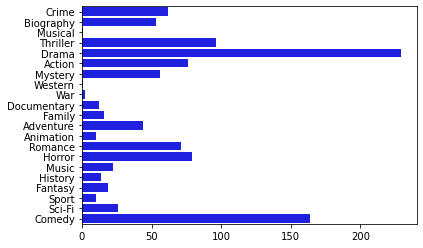

In [1018]:
sns.barplot(y = keys, x = values, color = 'blue')

###Lets Investigate by MPA Rating as well
Idea look at the genres where the most flops see if theres anything to stay away from

In [1105]:
com_group = df_budget_genres.groupby(by='Comedy').sum()

In [1107]:
com_group

,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,start_year,runtime_minutes,Crime,...,Family,Adventure,Animation,Romance,Horror,Music,History,Fantasy,Sport,Sci-Fi
Comedy,,,,,,,,,,,,,,,,,,,,,
0.0,15326,5.660200e+09,1.554955e+10,3.353550e+10,2.787530e+10,179465.0,2058.8,533766,28725.5,39.0,...,7.0,18.0,1.0,28.0,75.0,14.0,14.0,10.0,9.0,24.0
1.0,9051,4.155200e+09,1.071024e+10,2.020154e+10,1.604634e+10,75126.9,914.5,330304,17329.0,23.0,...,9.0,26.0,9.0,43.0,4.0,8.0,0.0,9.0,1.0,2.0


In [1106]:
df_budget_genres.groupby(by='Comedy').sum()

,id,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,start_year,runtime_minutes,Crime,...,Family,Adventure,Animation,Romance,Horror,Music,History,Fantasy,Sport,Sci-Fi
Comedy,,,,,,,,,,,,,,,,,,,,,
0.0,15326,5.660200e+09,1.554955e+10,3.353550e+10,2.787530e+10,179465.0,2058.8,533766,28725.5,39.0,...,7.0,18.0,1.0,28.0,75.0,14.0,14.0,10.0,9.0,24.0
1.0,9051,4.155200e+09,1.071024e+10,2.020154e+10,1.604634e+10,75126.9,914.5,330304,17329.0,23.0,...,9.0,26.0,9.0,43.0,4.0,8.0,0.0,9.0,1.0,2.0


In [1110]:
com_group.iloc[1]['worldwide_gross']

20201540585.0

In [1136]:
ww_gross = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).sum()
    ww_gross[genre] = grouped.iloc[1]['worldwide_gross']

In [1137]:
ww_gross_avg = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    ww_gross_avg[genre] = grouped.iloc[1]['worldwide_gross']

In [1157]:

max_roi_genre = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).max()
    max_roi_genre[genre] = grouped.iloc[1]['roi_percent']

In [1161]:
avg_roi_genre = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    avg_roi_genre[genre] = grouped.iloc[1]['roi_percent']

In [1163]:
avg_prod_budget = {}
for genre in all_genres:
    grouped = df_budget_genres.groupby(by =''.join(genre)).mean()
    avg_prod_budget[genre] = grouped.iloc[1]['production_budget']

In [1142]:
ww_gross_avg

{'Crime': 122348923.75806452,
 'Biography': 152739671.4528302,
 'Musical': 50827466.0,
 'Thriller': 138370908.53125,
 'Drama': 117478909.40611354,
 'Action': 166454629.31578946,
 'Mystery': 121582196.875,
 'Western': 252276928.0,
 'War': 109060110.0,
 'Documentary': 61298916.916666664,
 'Family': 117984713.4375,
 'Adventure': 162563478.88636363,
 'Animation': 238795442.3,
 'Romance': 120397643.92957747,
 'Horror': 109805546.06329113,
 'Music': 145486606.3181818,
 'History': 172209700.57142857,
 'Fantasy': 103467528.4736842,
 'Sport': 106054711.0,
 'Sci-Fi': 149113348.15384614,
 'Comedy': 123180125.51829268}

In [1138]:
ww_gross

{'Crime': 7585633273.0,
 'Biography': 8095202587.0,
 'Musical': 50827466.0,
 'Thriller': 13283607219.0,
 'Drama': 26902670254.0,
 'Action': 12650551828.0,
 'Mystery': 6808603025.0,
 'Western': 252276928.0,
 'War': 218120220.0,
 'Documentary': 735587003.0,
 'Family': 1887755415.0,
 'Adventure': 7152793071.0,
 'Animation': 2387954423.0,
 'Romance': 8548232719.0,
 'Horror': 8674638139.0,
 'Music': 3200705339.0,
 'History': 2410935808.0,
 'Fantasy': 1965883041.0,
 'Sport': 1060547110.0,
 'Sci-Fi': 3876947052.0,
 'Comedy': 20201540585.0}

INSERT scatter or bar plot of sum of wwgross per genre

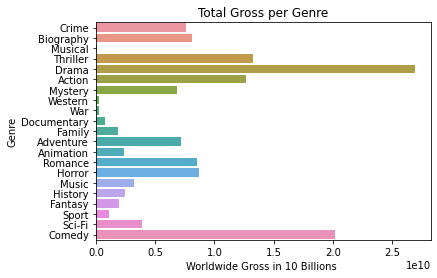

In [1152]:

df_items = pd.DataFrame(ww_gross.items())
ax = sns.barplot(data=df_items, x=1, y=0)
ax.set(xlabel = 'Worldwide Gross in 10 Billions ', ylabel='Genre', title='Total Gross per Genre');

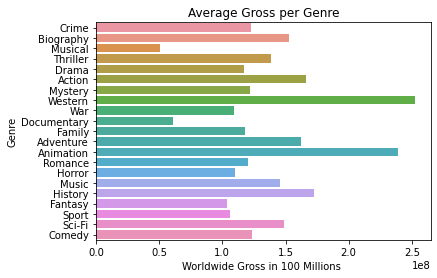

In [1158]:
df_items = pd.DataFrame(ww_gross_avg.items())
ax2 = sns.barplot(data=df_items, x=1, y=0)
ax2.set(xlabel = 'Worldwide Gross in 100 Millions ', ylabel='Genre', title='Average Gross per Genre');

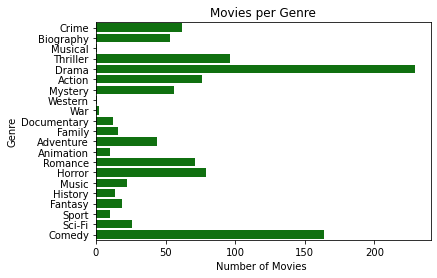

In [1150]:

ax3 = sns.barplot(y = keys, x = values, color = 'green')
ax3.set(xlabel = 'Number of Movies ', ylabel='Genre', title='Movies per Genre');

In [ ]:
ax2.set(xlabel = 'Worldwide Gross in 100 Millions ', ylabel='Genre', title='Average Gross per Genre')

In [1153]:
genre_count

{'Crime': 62,
 'Biography': 53,
 'Musical': 1,
 'Thriller': 96,
 'Drama': 229,
 'Action': 76,
 'Mystery': 56,
 'Western': 1,
 'War': 2,
 'Documentary': 12,
 'Family': 16,
 'Adventure': 44,
 'Animation': 10,
 'Romance': 71,
 'Horror': 79,
 'Music': 22,
 'History': 14,
 'Fantasy': 19,
 'Sport': 10,
 'Sci-Fi': 26,
 'Comedy': 164}

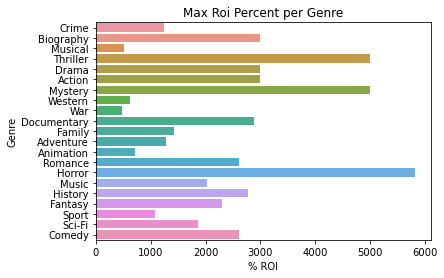

In [1160]:
max_roi_genre
df_items = pd.DataFrame(max_roi_genre.items())
ax4 = sns.barplot(data=df_items, x=1, y=0)
ax4.set(xlabel = '% ROI', ylabel='Genre', title='Max Roi Percent per Genre');

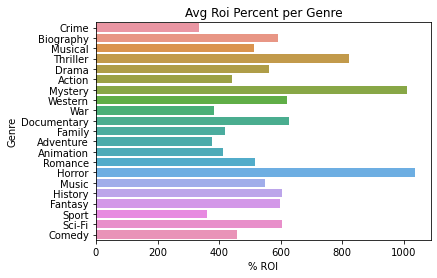

In [1162]:
avg_roi_genre
df_items = pd.DataFrame(avg_roi_genre.items())
ax5 = sns.barplot(data=df_items, x=1, y=0)
ax5.set(xlabel = '% ROI', ylabel='Genre', title='Avg Roi Percent per Genre');

<ipython-input-1191-2d46d7f039ff>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(xlabels);


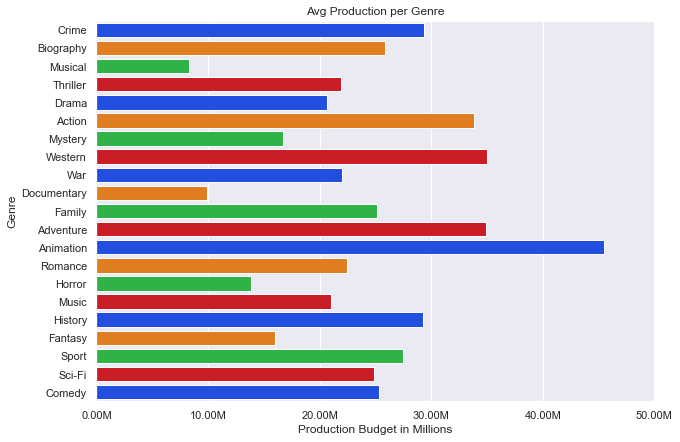

In [1191]:
avg_prod_budget

df_items = pd.DataFrame(avg_prod_budget.items())
sns.set(style="darkgrid") 
fig, ax6 = plt.subplots(figsize=(10, 7))    
palette = sns.color_palette("bright", 4)

ax6 = sns.barplot(data=df_items, x=1, y=0, palette= palette)
ax6.set(xlabel = 'Production Budget in Millions', ylabel='Genre', title='Avg Production per Genre')
#Turn Off Scientific Notationplt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
#ax6.xaxis.get_major_formatter().set_scientific(False)
ax6.set(xlim = (0,50000000))
xlabels = ['{:,.2f}'.format(x) + 'M' for x in ax6.get_xticks()/1000000]
ax6.set_xticklabels(xlabels);

In [1165]:
avg_prod_budget

{'Crime': 29322580.64516129,
 'Biography': 25839622.641509432,
 'Musical': 8300000.0,
 'Thriller': 21885416.666666668,
 'Drama': 20680786.026200872,
 'Action': 33865789.473684214,
 'Mystery': 16741071.42857143,
 'Western': 35000000.0,
 'War': 22000000.0,
 'Documentary': 9941666.666666666,
 'Family': 25156250.0,
 'Adventure': 34868181.81818182,
 'Animation': 45500000.0,
 'Romance': 22456338.028169014,
 'Horror': 13826582.278481012,
 'Music': 21036363.636363637,
 'History': 29285714.285714287,
 'Fantasy': 15989473.684210526,
 'Sport': 27500000.0,
 'Sci-Fi': 24880769.230769232,
 'Comedy': 25336585.36585366}

###Histogram of production budgets of all the movies to glean the ranges of budgets

In [ ]:
df_budget_genres

<ipython-input-1241-5d976c7bc959>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_xticklabels(xlabels);


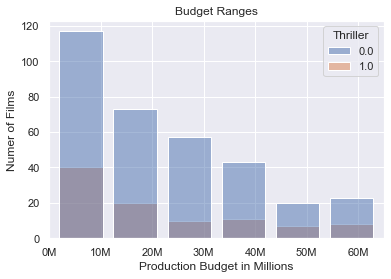

In [1241]:
ax7 = sns.histplot(df_budget_genres, x="production_budget",bins=6,shrink=.8,hue='Thriller')
ax7.set(xlabel = 'Production Budget in Millions', ylabel='Numer of Films', title='Budget Ranges')
#Turn Off Scientific Notationplt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
#ax6.xaxis.get_major_formatter().set_scientific(False)
ax7.set(xlim = (0,65000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in ax6.get_xticks()/1000000]
ax7.set_xticklabels(xlabels);

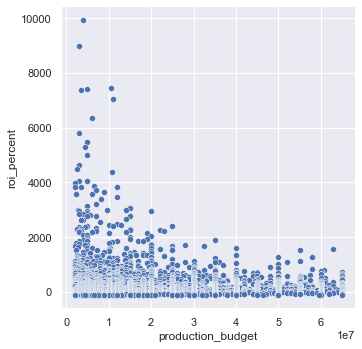

In [1250]:
#From original data set all movies...many ar not successful
sns.relplot(x="production_budget", y="roi_percent",
            data=df_budg_2to65mil);

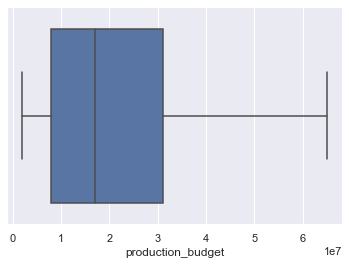

In [1252]:
sns.boxplot(x="production_budget",
            data=df_budg_2to65mil);

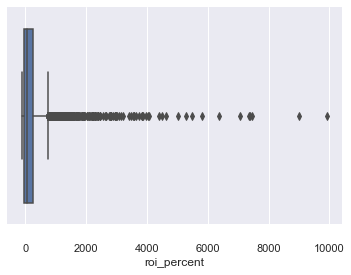

In [1254]:
sns.boxplot(x="roi_percent",
            data=df_budg_2to65mil);


In answering the question When to Release the movie lets look to see when previous movies were released.
Lets make a column for release month.


In [1255]:
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Adventure,Animation,Romance,Horror,Music,History,Fantasy,Sport,Sci-Fi,Comedy
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1281]:
df_budget_genres['release_month'] = pd.to_datetime(df_budget_genres.release_date).dt.strftime('%b')
#df_budget_genres['release_month'] = pd.to_datetime(df_budget_genres.release_date).dt.month

0      Oct
2      Feb
4      Oct
5      Oct
7      Dec
      ... 
539    Mar
540    Mar
541    Dec
542    Dec
543    Nov
Name: release_date, Length: 429, dtype: object

In [1262]:
df_budget_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Animation,Romance,Horror,Music,History,Fantasy,Sport,Sci-Fi,Comedy,release_month
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10
2,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10
5,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10
7,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12


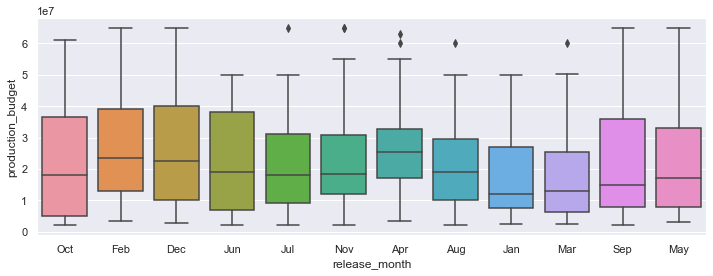

In [1284]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='release_month',y='production_budget',data=df_budget_genres,ax=ax)
plt.show()

[Text(0.5, 0, 'Month of Film Release'),
 Text(0, 0.5, 'Number of Films'),
 Text(0.5, 1.0, 'Month of Release')]

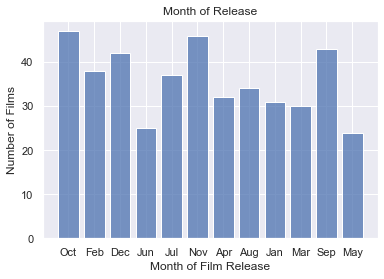

In [1283]:
##Histplot of movies release in month
ax7 = sns.histplot(df_budget_genres, x="release_month",bins=12,shrink=.8)
ax7.set(xlabel = 'Month of Film Release', ylabel='Number of Films', title='Month of Release')
#Turn Off Scientific Notationplt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
#ax6.xaxis.get_major_formatter().set_scientific(False)
#ax7.set(xlim = (0,65000000))
#xlabels = ['{:,.0f}'.format(x) + 'M' for x in ax6.get_xticks()/1000000]
#ax7.set_xticklabels(xlabels);

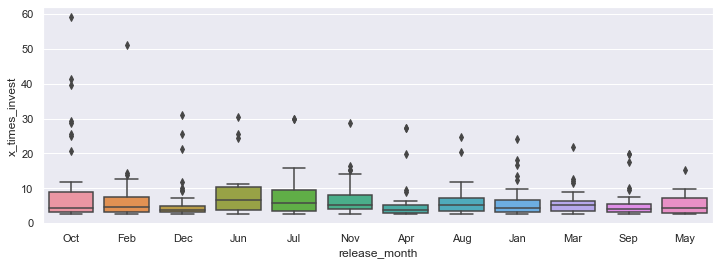

In [1282]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='release_month',y='x_times_invest',data=df_budget_genres,ax=ax)
plt.show()

,production_budget,roi_percent
production_budget,1.00000,-0.29411
roi_percent,-0.29411,1.00000


#How many movies a year?  Look at the successful studios number a year.
df_bom has studio info...Can join on budget genres to get month and year.  Not necessary can count studio and year 


In [1288]:
df_bom.head()

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [1293]:
df_budget_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 543
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 429 non-null    int64  
 1   release_date       429 non-null    object 
 2   movie              429 non-null    object 
 3   production_budget  429 non-null    float64
 4   domestic_gross     429 non-null    float64
 5   worldwide_gross    429 non-null    float64
 6   profit_over_pb     429 non-null    float64
 7   roi_percent        429 non-null    float64
 8   x_times_invest     429 non-null    float64
 9   primary_title      429 non-null    object 
 10  original_title     429 non-null    object 
 11  start_year         429 non-null    int64  
 12  runtime_minutes    429 non-null    float64
 13  genres             429 non-null    object 
 14  Crime              429 non-null    float64
 15  Biography          429 non-null    float64
 16  Musical            429 non

In [1295]:
df_studios_bud_genres = pd.merge(df_budget_genres, df_bom, 
                            left_on=  ['movie',pd.to_datetime(df_budget_genres['release_date']).dt.year],
                            right_on= ['title','year'], 
                            how = 'left')

In [1296]:
#checking the counts for all different genres

for col in df_studios_bud_genres:
    print(f'Viewing values in col: {col}')
    print(f'Top 5 values:\n{df_studios_bud_genres[col].value_counts()}')

Viewing values in col: id
Top 5 values:
84    10
34     9
91     9
73     9
77     9
      ..
10     1
25     1
30     1
53     1
48     1
Name: id, Length: 99, dtype: int64
Viewing values in col: release_date
Top 5 values:
Oct 10, 2014    6
Dec 25, 2014    5
Sep 21, 2012    3
Sep 18, 2015    3
Jan 17, 2014    3
               ..
Jun 7, 2013     1
Jun 28, 2017    1
May 4, 2018     1
May 13, 2011    1
May 31, 2019    1
Name: release_date, Length: 330, dtype: int64
Viewing values in col: movie
Top 5 values:
Big Eyes               2
Sisters                2
Spotlight              2
Truth or Dare          2
Lights Out             2
                      ..
St. Vincent            1
Sinister 2             1
Final Destination 5    1
Limitless              1
The Fighter            1
Name: movie, Length: 419, dtype: int64
Viewing values in col: production_budget
Top 5 values:
5000000.0     29
10000000.0    26
40000000.0    23
30000000.0    22
20000000.0    22
              ..
47000000.0     1
1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 0 to 428
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 429 non-null    int64  
 1   release_date       429 non-null    object 
 2   movie              429 non-null    object 
 3   production_budget  429 non-null    float64
 4   domestic_gross_x   429 non-null    float64
 5   worldwide_gross_x  429 non-null    float64
 6   profit_over_pb     429 non-null    float64
 7   roi_percent        429 non-null    float64
 8   x_times_invest     429 non-null    float64
 9   primary_title      429 non-null    object 
 10  original_title     429 non-null    object 
 11  start_year         429 non-null    int64  
 12  runtime_minutes    429 non-null    float64
 13  genres             429 non-null    object 
 14  Crime              429 non-null    float64
 15  Biography          429 non-null    float64
 16  Musical            429 non

In [1302]:
df_studios_bud_genres[df_studios_bud_genres.studio.isna()]

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross_x,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Fantasy,Sport,Sci-Fi,Comedy,release_month,studio,domestic_gross_y,foreign_gross,year,worldwide_gross_y
13,43,"Jun 6, 2014",The Fault in Our Stars,12000000.0,124872350.0,307166834.0,295166834.0,2459.7,25.6,The Fault in Our Stars,...,0.0,0.0,0.0,0.0,Jun,NaN,NaN,NaN,2014,NaN
14,36,"Oct 19, 2018",Halloween,10000000.0,159342015.0,254900667.0,244900667.0,2449.0,25.5,Halloween,...,0.0,0.0,0.0,0.0,Oct,NaN,NaN,NaN,2018,NaN
42,88,"Mar 22, 2019",Us,20000000.0,175006930.0,254210310.0,234210310.0,1171.1,12.7,Us,...,0.0,0.0,0.0,0.0,Mar,NaN,NaN,NaN,2019,NaN
46,100,"Jan 18, 2019",Glass,20000000.0,111035005.0,245303505.0,225303505.0,1126.5,12.3,Glass,...,0.0,0.0,1.0,0.0,Jan,NaN,NaN,NaN,2019,NaN
47,90,"Mar 16, 2018",I Can Only Imagine,7000000.0,83482352.0,85604221.0,78604221.0,1122.9,12.2,I Can Only Imagine,...,0.0,0.0,0.0,0.0,Mar,NaN,NaN,NaN,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,71,"May 31, 2019",Rocketman,41000000.0,57342725.0,108642725.0,67642725.0,165.0,2.6,Rocketman,...,0.0,0.0,0.0,0.0,May,NaN,NaN,NaN,2019,NaN
406,39,"Oct 14, 2011",Footloose,24000000.0,51802742.0,62989834.0,38989834.0,162.5,2.6,Footloose,...,0.0,0.0,0.0,1.0,Oct,NaN,NaN,NaN,2011,NaN
412,37,"Jan 22, 2010",Legion,26000000.0,40168080.0,67647574.0,41647574.0,160.2,2.6,Legion,...,1.0,0.0,0.0,0.0,Jan,NaN,NaN,NaN,2010,NaN
415,99,"Feb 27, 2015",Focus,65000000.0,53862963.0,168065700.0,103065700.0,158.6,2.6,Focus,...,0.0,0.0,0.0,1.0,Feb,NaN,NaN,NaN,2015,NaN


In [1310]:
df_bom[df_bom.index== 'Get Out']

,studio,domestic_gross,foreign_gross,year,worldwide_gross
title,,,,,
Get Out,Uni.,176000000.0,79400000.0,2017,255400000.0


In [1312]:
df_studios_bud_genres = df_studios_bud_genres[df_studios_bud_genres.studio.notna()]

In [1314]:
df_studios_bud_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 428
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 368 non-null    int64  
 1   release_date       368 non-null    object 
 2   movie              368 non-null    object 
 3   production_budget  368 non-null    float64
 4   domestic_gross_x   368 non-null    float64
 5   worldwide_gross_x  368 non-null    float64
 6   profit_over_pb     368 non-null    float64
 7   roi_percent        368 non-null    float64
 8   x_times_invest     368 non-null    float64
 9   primary_title      368 non-null    object 
 10  original_title     368 non-null    object 
 11  start_year         368 non-null    int64  
 12  runtime_minutes    368 non-null    float64
 13  genres             368 non-null    object 
 14  Crime              368 non-null    float64
 15  Biography          368 non-null    float64
 16  Musical            368 non

In [1315]:
#a set of distinct genres in the df
all_studios = set(df_studios_bud_genres['studio'])

In [1317]:
all_studios

41

In [ ]:
#getting a dict with Studio counts
studio_count = {}
for col in genre_cols:
    count = np.sum(df_budget_genres[col] == 1).sum() 
    genre_count[col] = count

In [1320]:
df_studios_bud_genres['studio'].value_counts()

Uni.        56
Fox         29
Sony        25
Par.        25
WB          21
WB (NL)     20
Wein.       19
LGF         18
FoxS        15
Focus       14
SGem        14
LG/S        11
BV          11
TriS        10
ORF         10
SPC          9
Rela.        8
STX          7
A24          6
CBS          5
Sum.         4
RAtt.        4
Eros         3
BH Tilt      3
W/Dim.       3
Affirm       2
IFC          2
EC           1
3D           1
BG           1
Orch.        1
PFR          1
LGP          1
UTV          1
Yash         1
RTWC         1
Over.        1
Neon         1
GrtIndia     1
Mira.        1
MGM          1
Name: studio, dtype: int64

In [1321]:
studio_count = dict(df_studios_bud_genres['studio'].value_counts())

In [1322]:
studio_count

{'Uni.': 56,
 'Fox': 29,
 'Sony': 25,
 'Par.': 25,
 'WB': 21,
 'WB (NL)': 20,
 'Wein.': 19,
 'LGF': 18,
 'FoxS': 15,
 'Focus': 14,
 'SGem': 14,
 'LG/S': 11,
 'BV': 11,
 'TriS': 10,
 'ORF': 10,
 'SPC': 9,
 'Rela.': 8,
 'STX': 7,
 'A24': 6,
 'CBS': 5,
 'Sum.': 4,
 'RAtt.': 4,
 'Eros': 3,
 'BH Tilt': 3,
 'W/Dim.': 3,
 'Affirm': 2,
 'IFC': 2,
 'EC': 1,
 '3D': 1,
 'BG': 1,
 'Orch.': 1,
 'PFR': 1,
 'LGP': 1,
 'UTV': 1,
 'Yash': 1,
 'RTWC': 1,
 'Over.': 1,
 'Neon': 1,
 'GrtIndia': 1,
 'Mira.': 1,
 'MGM': 1}

In [1376]:
df_bom_studio = df_bom.groupby(by=['studio','year']).count()

In [1377]:
df_bom_studio

domestic_gross  foreign_gross  worldwide_gross
studio year                                                
0      2010               1              1                1
       2011               1              1                1
       2012               1              1                1
       2014               1              1                1
       2017               1              1                1
...                     ...            ...              ...
Zeit.  2013               2              2                2
       2014               4              4                4
       2015               1              1                1
       2016               1              1                1
       2017               1              1                1

[747 rows x 3 columns]

In [1501]:
df_bom_studio_pivott = df_bom.pivot_table(index='studio' ,values='worldwide_gross',
                                          columns='year',
                                          margins=True,margins_name='count',
                                          aggfunc='count',fill_value=0)

In [1504]:

df_bom_studio_pivott.sort_values(['count'], ascending=[False], inplace=True)
df_bom_studio_pivott

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,count
studio,,,,,,,,,,
count,328,399,400,350,395,450,436,321,308,3387
IFC,22,33,22,17,18,21,16,9,8,166
Uni.,15,15,16,16,14,21,15,14,21,147
WB,19,17,15,11,18,18,12,13,17,140
Magn.,16,21,23,10,19,15,17,9,6,136
...,...,...,...,...,...,...,...,...,...,...
TAFC,0,0,0,0,0,1,0,0,0,1
Argo.,0,1,0,0,0,0,0,0,0,1
WOW,1,0,0,0,0,0,0,0,0,1


In [1373]:
type(df_bom_studio)

pandas.core.frame.DataFrame

In [1510]:
testpiv = df_bom_studio_pivott[1:21]

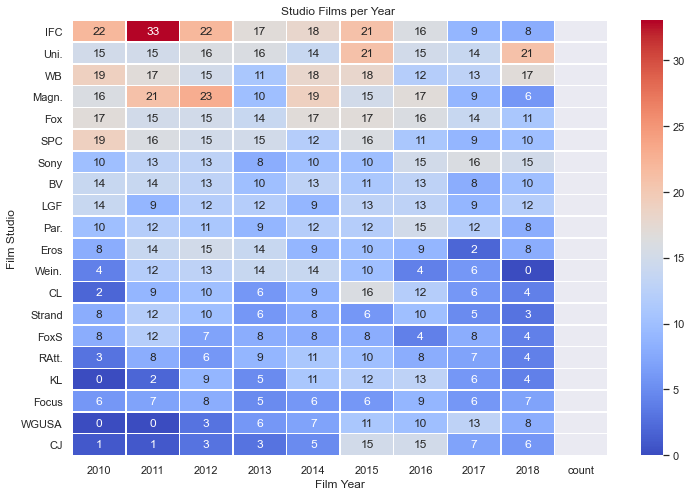

In [1526]:
mask=[False, False, False, False, False, False, 
                       False, False, False,True]
# use Seaborn styles
sns.set()
fig, ax9 = plt.subplots(figsize=(12, 8))

ax9 = sns.heatmap(annot=True, fmt="d", linewidths=.5,data=testpiv, ax=ax9, cmap='coolwarm',mask=mask)
ax9.set(xlabel = 'Film Year', ylabel='Film Studio', title='Studio Films per Year ')
plt.show()



### 

In [ ]:
Top 20 studios for total movies

In [1529]:
# of the Successful movies number per year
#df_studios_bud_genres['studio'].value_counts())
df_studio_budget_pivott = df_studios_bud_genres.pivot_table(index='studio' ,values='worldwide_gross_x',
                                          columns='year',
                                          margins=True,margins_name='count',
                                          aggfunc='count',fill_value=0)

In [1531]:
df_studio_budget_pivott.sort_values(['count'], ascending=[False], inplace=True)

In [1532]:
df_studio_budget_pivott

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,count
studio,,,,,,,,,,
count,37,42,41,39,45,45,50,35,34,368
Uni.,2,6,4,6,8,9,8,6,7,56
Fox,5,4,3,3,4,2,4,2,2,29
Sony,4,2,3,2,3,2,3,3,3,25
Par.,3,4,5,1,1,3,4,2,2,25
WB,3,2,4,0,3,4,2,1,2,21
WB (NL),1,3,0,2,3,2,5,2,2,20
Wein.,1,4,2,2,5,4,1,0,0,19
LGF,1,0,1,0,2,1,6,3,4,18


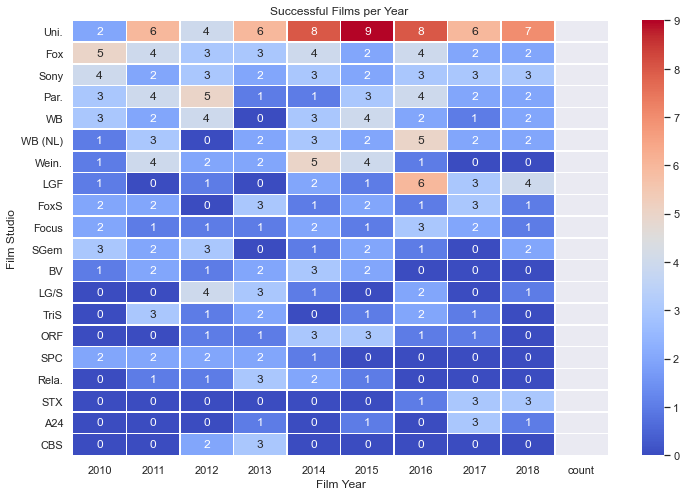

In [1538]:
mask=[False, False, False, False, False, False, 
                       False, False, False,True]
# use Seaborn styles
sns.set()
fig, ax10 = plt.subplots(figsize=(12, 8))

ax10 = sns.heatmap(annot=True, fmt="d", linewidths=.5,data=df_studio_budget_pivott[1:21], ax=ax10, cmap='coolwarm',mask=mask)
ax10.set(xlabel = 'Film Year', ylabel='Film Studio', title='Successful Films per Year ')
plt.show()

In [1769]:
df_studio_budget_pivott

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,count
studio,,,,,,,,,,
count,37,42,41,39,45,45,50,35,34,368
Uni.,2,6,4,6,8,9,8,6,7,56
Fox,5,4,3,3,4,2,4,2,2,29
Sony,4,2,3,2,3,2,3,3,3,25
Par.,3,4,5,1,1,3,4,2,2,25
WB,3,2,4,0,3,4,2,1,2,21
WB (NL),1,3,0,2,3,2,5,2,2,20
Wein.,1,4,2,2,5,4,1,0,0,19
LGF,1,0,1,0,2,1,6,3,4,18


In [1579]:
df_studio_genre_count_pivott

Horror      0.0                                     1.0                      \
Thriller    0.0                     1.0             0.0                 1.0   
Mystery     0.0         1.0         0.0     1.0     0.0         1.0     0.0   
Sci-Fi      0.0     1.0 0.0     1.0 0.0 1.0 0.0 1.0 0.0     1.0 0.0 1.0 0.0   
Fantasy     0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0   
studio year                                                                   
3D     2010   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
A24    2013   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
       2015   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
       2017   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
       2018   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   
...          ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
Wein.  2013   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
       2014   3   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   
       2015   3   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   
       2016   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Yash   2016   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

Horror               
Thriller             
Mystery         1.0  
Sci-Fi      1.0 0.0  
Fantasy     0.0 0.0  
studio year          
3D     2010   0   0  
A24    2013   0   0  
       2015   0   0  
       2017   0   0  
       2018   0   0  
...          ..  ..  
Wein.  2013   0   0  
       2014   0   0  
       2015   0   0  
       2016   0   0  
Yash   2016   0   0  

[163 rows x 18 columns]

In [1580]:
df_studios_bud_genres

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross_x,profit_over_pb,roi_percent,x_times_invest,primary_title,...,Fantasy,Sport,Sci-Fi,Comedy,release_month,studio,domestic_gross_y,foreign_gross,year,worldwide_gross_y
0,65,"Oct 20, 2010",Paranormal Activity 2,3000000.0,84752907.0,177512032.0,174512032.0,5817.1,59.2,Paranormal Activity 2,...,0.0,0.0,0.0,0.0,Oct,Par.,84800000.0,92800000.0,2010,177600000.0
1,49,"Feb 24, 2017",Get Out,5000000.0,176040665.0,255367951.0,250367951.0,5007.4,51.1,Get Out,...,0.0,0.0,0.0,0.0,Feb,Uni.,176000000.0,79400000.0,2017,255400000.0
2,51,"Oct 21, 2011",Paranormal Activity 3,5000000.0,104028807.0,207039844.0,202039844.0,4040.8,41.4,Paranormal Activity 3,...,0.0,0.0,0.0,0.0,Oct,Par.,104000000.0,103000000.0,2011,207000000.0
3,84,"Oct 3, 2014",Annabelle,6500000.0,84273813.0,256862920.0,250362920.0,3851.7,39.5,Annabelle,...,0.0,0.0,0.0,0.0,Oct,WB (NL),84300000.0,172800000.0,2014,257100000.0
4,56,"Dec 21, 2016",Dangal,9500000.0,12391761.0,294654618.0,285154618.0,3001.6,31.0,Dangal,...,0.0,0.0,0.0,0.0,Dec,UTV,12400000.0,290500000.0,2016,302900000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,81,"Mar 4, 2011",The Adjustment Bureau,50200000.0,62495645.0,126931325.0,76731325.0,152.9,2.5,The Adjustment Bureau,...,0.0,0.0,1.0,0.0,Mar,Uni.,62500000.0,65400000.0,2011,127900000.0
425,58,"Mar 18, 2011",Paul,40000000.0,37412945.0,101162106.0,61162106.0,152.9,2.5,Paul,...,0.0,0.0,1.0,1.0,Mar,Uni.,37400000.0,60600000.0,2011,98000000.0
426,82,"Dec 25, 2014",Unbroken,65000000.0,115637895.0,163527824.0,98527824.0,151.6,2.5,Unbroken,...,0.0,1.0,0.0,0.0,Dec,Uni.,115600000.0,47800000.0,2014,163400000.0
427,8,"Dec 29, 2010",Another Year,8000000.0,3205706.0,20005613.0,12005613.0,150.1,2.5,Another Year,...,0.0,0.0,0.0,1.0,Dec,SPC,3200000.0,16500000.0,2010,19700000.0


In [1777]:
df_studio_genre_count_group = df_studios_bud_genres.groupby(by=['studio','year']).sum()

In [1774]:
df_studio_genre_count_group

id  release_date  movie  production_budget  domestic_gross_x  \
studio year                                                                 
3D     2010   1             1      1                  1                 1   
A24    2013   1             1      1                  1                 1   
       2015   1             1      1                  1                 1   
       2017   3             3      3                  3                 3   
       2018   1             1      1                  1                 1   
...          ..           ...    ...                ...               ...   
Wein.  2013   2             2      2                  2                 2   
       2014   5             5      5                  5                 5   
       2015   4             4      4                  4                 4   
       2016   1             1      1                  1                 1   
Yash   2016   1             1      1                  1                 1   

             worldwide_gross_x  profit_over_pb  roi_percent  x_times_invest  \
studio year                                                                   
3D     2010                  1               1            1               1   
A24    2013                  1               1            1               1   
       2015                  1               1            1               1   
       2017                  3               3            3               3   
       2018                  1               1            1               1   
...                        ...             ...          ...             ...   
Wein.  2013                  2               2            2               2   
       2014                  5               5            5               5   
       2015                  4               4            4               4   
       2016                  1               1            1               1   
Yash   2016                  1               1            1               1   

             primary_title  ...  Music  History  Fantasy  Sport  Sci-Fi  \
studio year                 ...                                           
3D     2010              1  ...      1        1        1      1       1   
A24    2013              1  ...      1        1        1      1       1   
       2015              1  ...      1        1        1      1       1   
       2017              3  ...      3        3        3      3       3   
       2018              1  ...      1        1        1      1       1   
...                    ...  ...    ...      ...      ...    ...     ...   
Wein.  2013              2  ...      2        2        2      2       2   
       2014              5  ...      5        5        5      5       5   
       2015              4  ...      4        4        4      4       4   
       2016              1  ...      1        1        1      1       1   
Yash   2016              1  ...      1        1        1      1       1   

             Comedy  release_month  domestic_gross_y  foreign_gross  \
studio year                                                           
3D     2010       1              1                 1              1   
A24    2013       1              1                 1              1   
       2015       1              1                 1              1   
       2017       3              3                 3              3   
       2018       1              1                 1              1   
...             ...            ...               ...            ...   
Wein.  2013       2              2                 2              2   
       2014       5              5                 5              5   
       2015       4              4                 4              4   
       2016       1              1                 1              1   
Yash   2016       1              1                 1              1   

             worldwide_gross_y  
studio year                     
3D     2010      

In [1778]:
df_studio_genre_count_group.drop(columns=['domestic_gross_x','runtime_minutes',
                                 'domestic_gross_y',
                                 'foreign_gross','worldwide_gross_y',
                                'production_budget','worldwide_gross_x',
                                'id','profit_over_pb','roi_percent','x_times_invest',
                                 'start_year'],inplace=True)

In [1602]:
df_studio_genre_count_group.drop(columns=['domestic_gross_x','runtime_minutes',
                                 'domestic_gross_y',
                                 'foreign_gross','worldwide_gross_y',
                                'production_budget','worldwide_gross_x',
                                'id','profit_over_pb','roi_percent','x_times_invest',
                                 'start_year'],inplace=True)

In [1779]:
df_studio_genre_count_group

Crime  Biography  Musical  Thriller  Drama  Action  Mystery  \
studio year                                                                
3D     2010    0.0        0.0      0.0       0.0    0.0     0.0      0.0   
A24    2013    0.0        0.0      0.0       0.0    1.0     0.0      0.0   
       2015    0.0        0.0      0.0       1.0    1.0     0.0      0.0   
       2017    0.0        1.0      0.0       0.0    3.0     0.0      0.0   
       2018    0.0        0.0      0.0       0.0    1.0     0.0      1.0   
...            ...        ...      ...       ...    ...     ...      ...   
Wein.  2013    0.0        2.0      0.0       0.0    2.0     0.0      0.0   
       2014    1.0        2.0      0.0       1.0    4.0     0.0      0.0   
       2015    0.0        1.0      0.0       1.0    3.0     1.0      0.0   
       2016    0.0        1.0      0.0       0.0    1.0     0.0      0.0   
Yash   2016    0.0        0.0      0.0       0.0    1.0     1.0      0.0   

             Western  War  Documentary  ...  Adventure  Animation  Romance  \
studio year                             ...                                  
3D     2010      0.0  0.0          1.0  ...        0.0        0.0      0.0   
A24    2013      0.0  0.0          0.0  ...        0.0        0.0      1.0   
       2015      0.0  0.0          0.0  ...        0.0        0.0      0.0   
       2017      0.0  0.0          0.0  ...        0.0        0.0      0.0   
       2018      0.0  0.0          0.0  ...        0.0        0.0      0.0   
...              ...  ...          ...  ...        ...        ...      ...   
Wein.  2013      0.0  0.0          0.0  ...        0.0        0.0      0.0   
       2014      0.0  0.0          1.0  ...        0.0        0.0      1.0   
       2015      0.0  0.0          0.0  ...        0.0        0.0      1.0   
       2016      0.0  0.0          0.0  ...        0.0        0.0      0.0   
Yash   2016      0.0  0.0          0.0  ...        0.0        0.0      0.0   

             Horror  Music  History  Fantasy  Sport  Sci-Fi  Comedy  
studio year                                                          
3D     2010     0.0    0.0      0.0      0.0    0.0     0.0     0.0  
A24    2013     0.0    0.0      0.0      0.0    0.0     0.0     1.0  
       2015     0.0    0.0      0.0      0.0    0.0     0.0     0.0  
       2017     0.0    0.0      0.0      0.0    0.0     0.0     2.0  
       2018     1.0    0.0      0.0      0.0    0.0     0.0     0.0  
...             ...    ...      ...      ...    ...     ...     ...  
Wein.  2013     0.0    0.0      0.0      0.0    0.0     0.0     1.0  
       2014     0.0    0.0      0.0      0.0    0.0     1.0     1.0  
       2015     0.0    0.0      1.0      0.0    1.0     0.0     0.0  
       2016     0.0    0.0      0.0      0.0    0.0     0.0     0.0  
Yash   2016     0.0    0.0      0.0      0.0    1.0     0.0     0.0  

[163 rows x 21 columns]

In [1797]:
df_studio_genre_count_group.unstack()






Crime                                         Biography  ... Sci-Fi  \
year      2010 2011 2012 2013 2014 2015 2016 2017 2018      2010  ...   2018   
studio                                                            ...          
3D         0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
A24        NaN  NaN  NaN  0.0  NaN  0.0  NaN  0.0  0.0       NaN  ...    0.0   
Affirm     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0       NaN  ...    0.0   
BG         NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN       NaN  ...    NaN   
BH Tilt    NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  0.0       NaN  ...    1.0   
BV         0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN       0.0  ...    NaN   
CBS        NaN  NaN  0.0  0.0  NaN  NaN  NaN  NaN  NaN       NaN  ...    NaN   
EC         NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN       NaN  ...    NaN   
Eros       NaN  NaN  0.0  0.0  NaN  0.0  NaN  NaN  NaN       NaN  ...    NaN   
Focus      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0       0.0  ...    0.0   
Fox        2.0  2.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0       0.0  ...    0.0   
FoxS       0.0  0.0  NaN  0.0  1.0  0.0  0.0  1.0  0.0       1.0  ...    0.0   
GrtIndia   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN       NaN  ...    NaN   
IFC        NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN  NaN       NaN  ...    NaN   
LG/S       NaN  NaN  0.0  0.0  1.0  NaN  0.0  NaN  0.0       NaN  ...    0.0   
LGF        0.0  NaN  0.0  NaN  0.0  1.0  2.0  1.0  1.0       0.0  ...    0.0   
LGP        NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN       NaN  ...    NaN   
MGM        NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0       NaN  ...    0.0   
Mira.      0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
Neon       NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN       NaN  ...    NaN   
ORF        NaN  NaN  1.0  0.0  1.0  2.0  0.0  0.0  NaN       NaN  ...    NaN   
Orch.      NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN       NaN  ...    NaN   
Over.      0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
PFR        NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN  NaN       NaN  ...    NaN   
Par.       0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0       1.0  ...    1.0   
RAtt.      0.0  0.0  0.0  NaN  NaN  NaN  0.0  NaN  NaN       0.0  ...    NaN   
RTWC       NaN  NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN       NaN  ...    NaN   
Rela.      NaN  0.0  0.0  0.0  1.0  0.0  NaN  NaN  NaN       NaN  ...    NaN   
SGem       0.0  0.0  0.0  NaN  0.0  1.0  1.0  NaN  0.0       0.0  ...    0.0   
SPC        1.0  1.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN       0.0  ...    NaN   
STX        NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0       NaN  ...    0.0   
Sony       0.0  0.0  1.0  1.0  2.0  1.0  0.0  0.0  0.0       1.0  ...    0.0   
Sum.       0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
TriS       NaN  0.0  1.0  1.0  NaN  0.0  1.0  1.0  NaN       NaN  ...    NaN   
UTV        NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN       NaN  ...    NaN   
Uni.       0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0       0.0  ...    1.0   
W/Dim.     0.0  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN       0.0  ...    NaN   
WB         1.0  0.0  0.0  NaN  1.0  1.0  1.0  0.0  1.0       0.0  ...    0.0   
WB (NL)    0.0  1.0  NaN  1.0  0.0  0.0  1.0  0.0  1.0       0.0  ...    0.0   
Wein.      0.0  0.0  1.0  0.0  1.0  0.0  0.0  NaN  NaN       1.0  ...    NaN   
Yash       NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  NaN       NaN  ...    NaN   

         Comedy                                          
year       2010 2011 2012 2013 2014 2015 2016 2017 2018  
studio                                                   
3D          0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
A24         NaN  NaN  NaN  1.0  NaN  0.0  NaN  2.0  0.0  
Affirm      NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  
BG          NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  
BH Tilt     NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN  0.0  
BV          0.0  1.0  0.

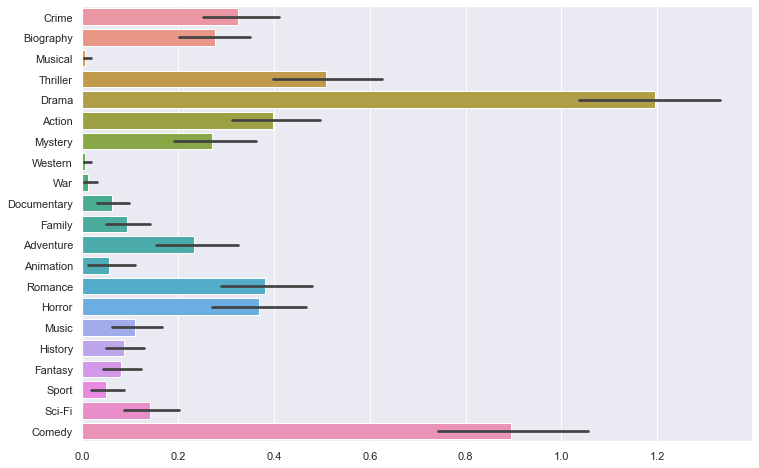

In [1798]:
# use Seaborn styles
sns.set()
fig, ax11 = plt.subplots(figsize=(12, 8))

ax11 = sns.barplot(data=df_studio_genre_count_group, orient='h')
#ax11.set(xlabel = 'Film Year', ylabel='Film Studio', title='Num Thrillers per Year by Studio ')
plt.show()

In [1620]:
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

In [1621]:
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


In [1572]:
#Pivot not giving results im an needing.
#Will create interative
studio_genre_count = dict(df_studios_bud_genres['studio'].value_counts())

In [1573]:
studio_genre_count

{'Uni.': 56,
 'Fox': 29,
 'Sony': 25,
 'Par.': 25,
 'WB': 21,
 'WB (NL)': 20,
 'Wein.': 19,
 'LGF': 18,
 'FoxS': 15,
 'Focus': 14,
 'SGem': 14,
 'LG/S': 11,
 'BV': 11,
 'TriS': 10,
 'ORF': 10,
 'SPC': 9,
 'Rela.': 8,
 'STX': 7,
 'A24': 6,
 'CBS': 5,
 'Sum.': 4,
 'RAtt.': 4,
 'Eros': 3,
 'BH Tilt': 3,
 'W/Dim.': 3,
 'Affirm': 2,
 'IFC': 2,
 'EC': 1,
 '3D': 1,
 'BG': 1,
 'Orch.': 1,
 'PFR': 1,
 'LGP': 1,
 'UTV': 1,
 'Yash': 1,
 'RTWC': 1,
 'Over.': 1,
 'Neon': 1,
 'GrtIndia': 1,
 'Mira.': 1,
 'MGM': 1}